# Detección de Objetos en Tiempo Real con YOLO

**Objetivo:** Después de entender la teoría detrás de los detectores de dos pasos como R-CNN, en este notebook nos sumergiremos en el paradigma que revolucionó la detección de objetos: YOLO (You Only Look Once). Explicaremos su arquitectura y, lo más importante, usaremos un modelo YOLOv8 pre-entrenado para detectar objetos en varias imágenes.

### 1. YOLO: El Cambio a Detectores de Un Solo Paso

Como vimos, la familia R-CNN, aunque efectiva, sufría de un problema de velocidad por su naturaleza de dos pasos (proponer regiones y luego clasificarlas). YOLO, propuesto por Joseph Redmon et al., cambió las reglas del juego al tratar la detección de objetos como un **único problema de regresión**.

**¿Cómo funciona?**

1.  **Divide la imagen en una cuadrícula (Grid):** La imagen de entrada se divide en una cuadrícula (ej. S x S).
2.  **Predicción por Celda:** Cada celda de la cuadrícula es responsable de predecir si el centro de un objeto cae dentro de ella. Si es así, la celda predice:
    -   Los **cuadros delimitadores (bounding boxes)** para ese objeto.
    -   Un **puntaje de confianza** (qué tan seguro está de que hay un objeto).
    -   Las **probabilidades de clase** (qué tipo de objeto es).
3.  **Una Sola Pasada:** Todo esto se logra en una única pasada de la imagen a través de la red neuronal, lo que hace a YOLO extremadamente rápido.

![Diagrama conceptual de YOLO](images/yolo_architecture.png)

### 2. La Arquitectura de YOLO

Un modelo YOLO moderno típicamente se divide en tres partes:

- **Backbone (Columna Vertebral):** Es una red convolucional profunda (como una versión de ResNet o CSPDarknet) que actúa como un extractor de características.
- **Neck (Cuello):** Conecta el Backbone con el Head, combinando mapas de características de diferentes escalas para detectar objetos grandes y pequeños.
- **Head (Cabeza):** Realiza las predicciones finales: cuadros delimitadores, confianzas y clases.

Ahora, ¡manos a la obra!

### 3. Práctica: Detección de Objetos con YOLOv8

Usaremos la librería `ultralytics` y un modelo **YOLOv8** pre-entrenado en el dataset COCO (80 clases de objetos comunes).

In [1]:
# Paso 2: Importar librerías
from ultralytics import YOLO
from PIL import Image
import requests
import matplotlib.pyplot as plt

In [2]:
# Paso 3: Cargar un modelo YOLOv8 pre-entrenado
model = YOLO('yolov8n.pt')

### 4. Función Auxiliar para Detección y Visualización

Para no repetir código, crearemos una función que tome una URL de una imagen, realice la detección y la muestre.

In [3]:
def detect_and_show(image_url):
    """Toma la URL de una imagen, la procesa con YOLO y muestra los resultados."""
    try:
        image = Image.open(requests.get(image_url, stream=True).raw)
        results = model(image) # Realizar la detección
        
        for r in results:
            im_array = r.plot()  # Dibuja los cuadros y etiquetas
            im = Image.fromarray(im_array[..., ::-1]) # Convierte de BGR a RGB
        
        # Mostrar la imagen con las detecciones
        plt.figure(figsize=(8, 8))
        plt.imshow(im)
        plt.axis('off')
        plt.show()
        
    except Exception as e:
        print(f"No se pudo procesar la imagen desde {image_url}. Error: {e}")

### 5. Probando el Modelo con Múltiples Ejemplos

Ahora, usemos nuestra función con una lista de imágenes para ver qué tan versátil es el modelo.

--- Procesando imagen: https://ultralytics.com/images/bus.jpg... ---

0: 640x480 4 persons, 1 bus, 1 stop sign, 191.2ms
Speed: 7.4ms preprocess, 191.2ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 480)


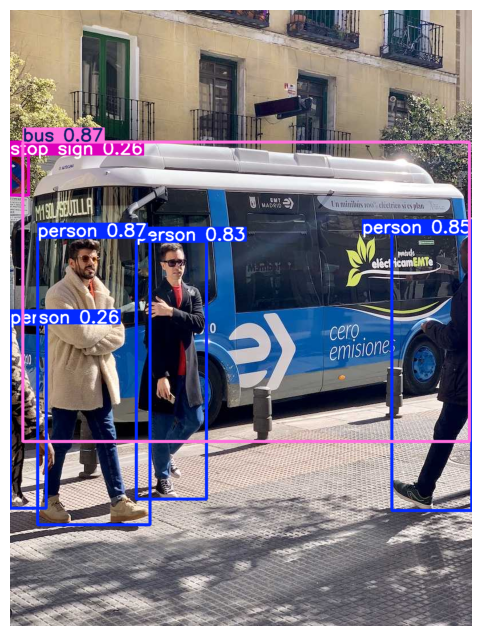

--- Procesando imagen: https://ultralytics.com/images/zidane.jpg... ---

0: 384x640 2 persons, 1 tie, 199.3ms
Speed: 4.9ms preprocess, 199.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


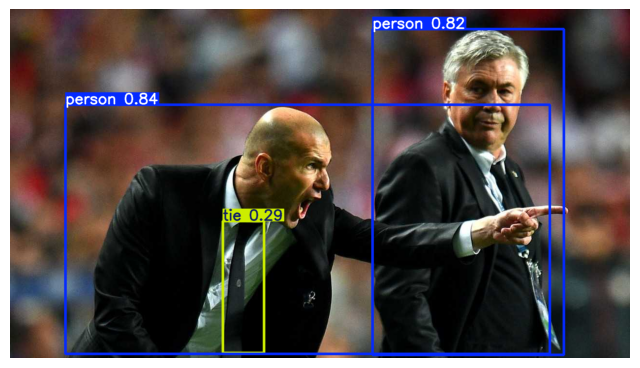

--- Procesando imagen: https://images.pexels.com/photos/1099680/pexels-ph... ---

0: 448x640 1 spoon, 2 bowls, 2 carrots, 1 dining table, 206.9ms
Speed: 4.9ms preprocess, 206.9ms inference, 2.5ms postprocess per image at shape (1, 3, 448, 640)


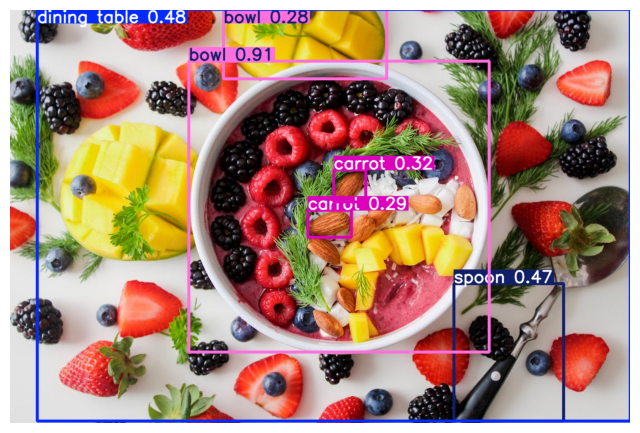

--- Procesando imagen: https://images.pexels.com/photos/1571460/pexels-ph... ---

0: 416x640 2 chairs, 1 couch, 1 dining table, 1 clock, 196.4ms
Speed: 5.0ms preprocess, 196.4ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 640)


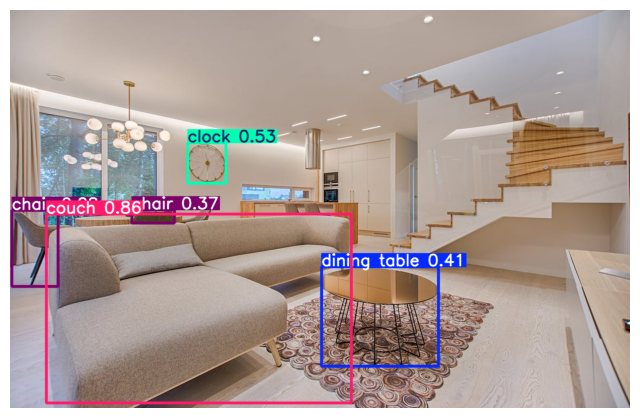

--- Procesando imagen: https://images.pexels.com/photos/3785931/pexels-ph... ---

0: 448x640 3 clocks, 173.6ms
Speed: 5.8ms preprocess, 173.6ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)


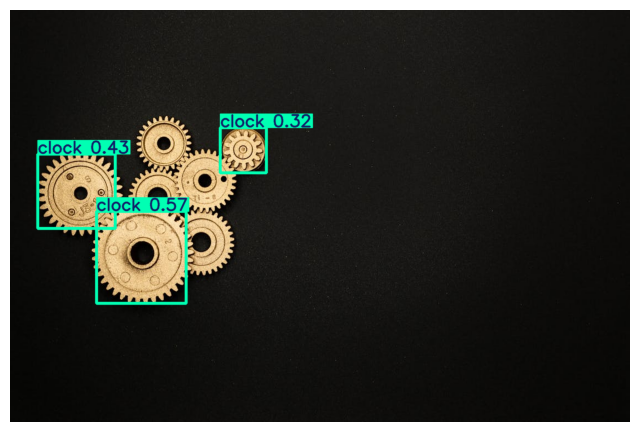

In [4]:
image_urls = [
    # Ejemplo 1: Escena urbana (el original)
    'https://ultralytics.com/images/bus.jpg',
    # Ejemplo 2: Escena deportiva
    'https://ultralytics.com/images/zidane.jpg',
    # Ejemplo 3: Escena de comida
    'https://images.pexels.com/photos/1099680/pexels-photo-1099680.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1',
    # Ejemplo 4: Escena interior
    'https://images.pexels.com/photos/1571460/pexels-photo-1571460.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1',
    # Ejemplo 5: Escena de tráfico
    'https://images.pexels.com/photos/3785931/pexels-photo-3785931.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1'
]

for url in image_urls:
    print(f"--- Procesando imagen: {url[:50]}... ---")
    detect_and_show(url)

### 6. Explicación de los Resultados

¡Los resultados son impresionantes! Con solo unas pocas líneas de código, hemos localizado y clasificado múltiples objetos en una variedad de escenas. Analicemos lo que vemos en los ejemplos:

- **Cuadros Delimitadores (Bounding Boxes):** Cada cuadro de color encierra un objeto que el modelo ha detectado.
- **Etiqueta de Clase:** Encima de cada cuadro, vemos la clase predicha (ej. `person`, `bus`, `car`, `bowl`, `chair`).
- **Puntaje de Confianza:** Junto a la etiqueta, hay un número (ej. `0.89`). Esta es la confianza que el modelo tiene en su propia predicción. Un valor cercano a 1.0 significa que el modelo está muy seguro.

El modelo demuestra su capacidad para identificar correctamente personas en diferentes contextos, vehículos, comida y muebles, probando la eficacia de YOLO para analizar escenas complejas y variadas.

### 7. Conclusión del Curso

¡Felicidades! A lo largo de estas tres sesiones, hemos realizado un viaje completo:

1.  Comenzamos con **redes neuronales densas** y descubrimos por qué no son adecuadas para imágenes.
2.  Introdujimos las **Redes Neuronales Convolucionales (CNNs)**, construyendo modelos desde cero y explorando arquitecturas clásicas como LeNet-5 y AlexNet.
3.  Finalmente, dimos el salto a la **detección de objetos**, entendiendo los conceptos de R-CNN y utilizando un modelo de última generación como **YOLO** para una tarea del mundo real.

Este es solo el comienzo del fascinante mundo de la visión por computadora. Ahora tienes el conocimiento fundamental para entender cómo funcionan estas poderosas herramientas y cómo empezar a aplicarlas en tus propios proyectos. ¡Excelente trabajo!